## SVM Checker

[[-0.19050546  0.26636809]
 [ 0.2944719  -1.31703766]
 [-0.37595744  0.20831192]
 [ 1.29992227 -0.2070605 ]
 [ 0.95178105 -0.0222313 ]
 [-0.25746665 -0.39161754]
 [ 2.28187114 -2.35202503]
 [-0.8890648  -0.25010475]
 [ 1.61029271 -0.46367603]
 [-0.95065674  0.2858359 ]]
     pcost       dcost       gap    pres   dres
 0: -2.7481e+00 -2.4814e+00  5e+01  7e+00  3e-16
 1: -9.8218e-01 -2.0771e+00  3e+00  3e-01  3e-16
 2: -7.3601e-01 -1.1353e+00  4e-01  7e-17  6e-16
 3: -7.4983e-01 -7.8237e-01  3e-02  5e-17  3e-16
 4: -7.5467e-01 -7.5994e-01  5e-03  5e-17  4e-16
 5: -7.5642e-01 -7.5675e-01  3e-04  4e-17  3e-16
 6: -7.5654e-01 -7.5656e-01  3e-05  6e-17  3e-16
 7: -7.5655e-01 -7.5655e-01  9e-07  4e-17  4e-16
 8: -7.5655e-01 -7.5655e-01  1e-08  5e-17  2e-16
Optimal solution found.


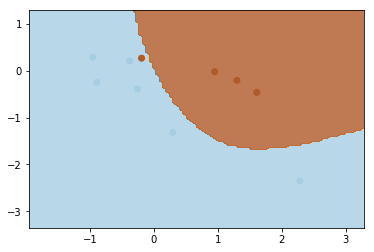

In [19]:
%matplotlib inline

import svm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools




def example(num_samples=10, num_features=2, grid_size=50):
    
    samples = np.matrix(np.random.normal(size=num_samples * num_features)
                        .reshape(num_samples, num_features))
    
    labels = 2 * (samples.sum(axis=1) > 0) - 1.0
    
    trainer = svm.SVMTrainer(svm.Kernel.gaussian())
    
    predictor = trainer.train(samples, labels)

    plot(predictor, samples, labels, grid_size)


def plot(predictor, X, y, grid_size):
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, grid_size),
        np.linspace(y_min, y_max, grid_size),
        indexing='ij'
    )
    
    flatten = lambda m: np.array(m).reshape(-1,)

    result = []
    
    for (i, j) in itertools.product(range(grid_size), range(grid_size)):
        point = np.array([xx[i, j], yy[i, j]]).reshape(1, 2)
        result.append(predictor.predict(point))

    Z = np.array(result).reshape(xx.shape)
    
    plt.contourf(
        xx, yy, Z,
        cmap=cm.Paired,
        levels=[-0.01, 0.01],
        extend='both',
        alpha=0.8
    )
    
    
    plt.scatter(
        flatten(X[:, 0]),
        flatten(X[:, 1]),
        c=flatten(y),
        cmap=cm.Paired
    )
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
example()